# Linear Regression, Ridge, Lasso, Elastic Net on Algerian Data set

By Andan M
1. GitHub: https://github.com/andanm 
2. LinkedIn: https://www.linkedin.com/in/andan-m-854bb824a/

Dataset link: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

Problem Statement

To Predict the temperature of the region fire had been occured by using Algeiran Data set by Machine learning Algorithm 
1. Linera Regression
2. Ridge
3. Lasso
4. Elastic Net

In [1]:
# Importing all the required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing dataset 
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.iloc[121:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
#Dropping dataset which doesnot contain any info
df.drop(index=[122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.iloc[121:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [5]:
#Creating Region Features
df.loc[:122,"Region"]=0
df.loc[122: , 'Region']=1
df.iloc[120:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0


In [6]:
#Getting a information and describing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


Information about the dataset

1. Data include 244 instance from both the region that are Bejaia region and Sidi Bel-abbes region
2. Two regions are having 122 each instances.
3. Dataset contain 11 attributes and 1 output column that is Classes.
4. The data is from the month June 2012 to Sept 2012

Attritube information.

1. Date: Day, Month and Year which is from June to September 2012
2. Temperature: Contains the Temperature value from 22 deg C to 42 deg C
3. RH(Relative Humidity): 21% to 90%
4. WS(Wind Speed): 6 to 29 KMPH
5. Rain : 0 to 16.8 Cms
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

In [7]:
# Columns
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [8]:
#Stripping Space from the features name for eg: ' RH', ' WS'
df.columns= [col_name.strip() for col_name in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
#Converting all the feature's datatype to str to clean the dataset
df=df.astype(str)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [11]:
#Removing the extra space from the dataset
for features in ['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI', "Classes"]:
    df[features]=df[features].str.replace(" ","")

In [12]:
# Replacing the Fire value to 0.1 in FWI
df[df['FWI']=='fire'].index

Int64Index([165], dtype='int64')

In [13]:
df.loc[165,'FWI']=0.1

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,notfire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,notfire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,notfire,0.0


In [15]:
df[df['Classes']=='nan'].index

Int64Index([165], dtype='int64')

In [16]:
df.loc[165,'Classes']= 'fire'

In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,notfire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,notfire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,notfire,0.0


In [18]:
#Encoding the Classes feature with 0 and 1
df['Classes']=df['Classes'].str.replace('notfire','0')
df['Classes']=df['Classes'].str.replace('fire','1')

In [19]:
#Changing datatype for further featuring
df_convert={'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64', 'Ws':'int64','Rain':'float64',
 'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'FWI':'float64',
 'Classes':'int64', 'Region':'float64'}
df=df.astype(df_convert)
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region         float64
dtype: object

In [20]:
#Numerical and Categorical Features
# Categorical Feature
Cat_feature=[feature for feature in df.columns if df[feature].dtypes=='O']

#Generating the Cat feature with region
for feature in Cat_feature:
    print(df.groupby(feature)['Region'].value_counts())

<AxesSubplot:xlabel='Classes', ylabel='count'>

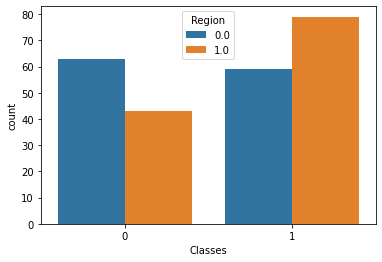

In [21]:
sns.countplot(data=df, x='Classes', hue= 'Region')

Observation: By seeing the above graph, we can conclude fire has happened Sidi Bel-abbes region than Bejaia region.

In [22]:
#Getting a list of Numerical Features
Num_feature=[feature for feature in df.columns if df[feature].dtypes!='O']
print(Num_feature)

['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']


In [23]:
#Getting a count of unique values in Num_Features
df[Num_feature].nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
Region           2
dtype: int64

In [24]:
# Classifying the Discreate and Countinous features
Dis_feature=[feature for feature in Num_feature if len(df[feature].unique())<35]
Dis_feature

['day', 'month', 'year', 'Temperature', 'Ws', 'Classes', 'Region']

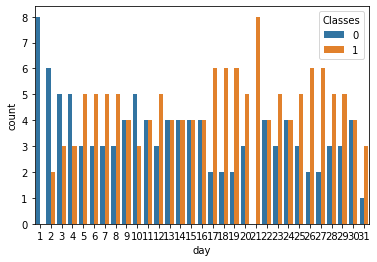

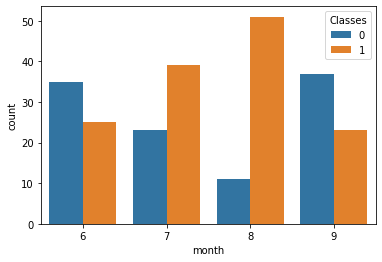

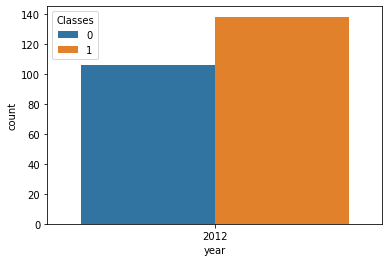

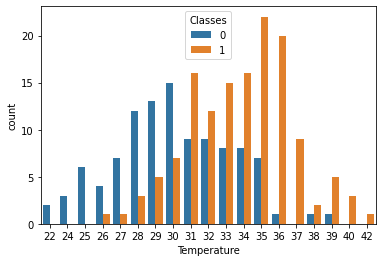

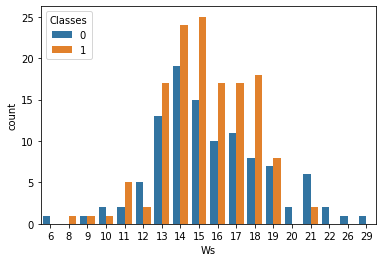

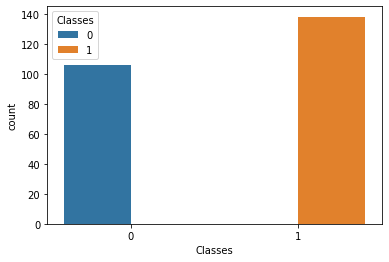

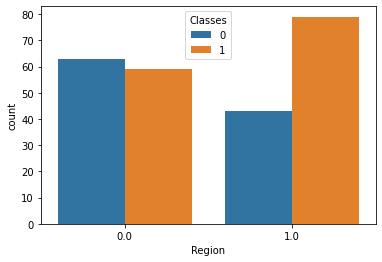

In [25]:
#Discrete feature v/s Target Features
for feature in Dis_feature:
    sns.countplot(data=df, x=feature, hue= 'Classes')
    plt.show()

Observations:

1. By day vs Classes, it is observed that almost everyday fire has occured.
2. By Month vs Classes, it observer that fire has occured more in July and August compare to June and September
3. By August month number od cases is more.
4. Fire Cases has occured more than the No Fire Cases.
5. By Temp vs Classes, it tells if the temp is between 31 deg to 37 deg, Fire cases are more
6. By WS vs Classes, it tells if the Wind speed is between 13 KMPH to 19 KMPH, Fire cases are more6

In [26]:
#Generating Con_Features
Con_feature=[feature for feature in Num_feature if feature not in Dis_feature]
Con_feature

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

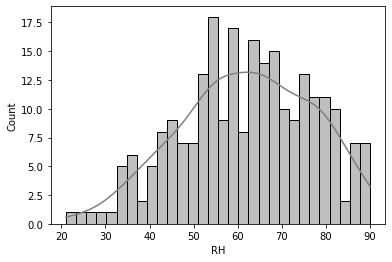

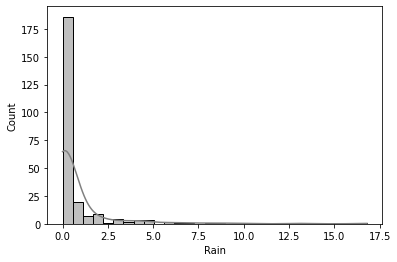

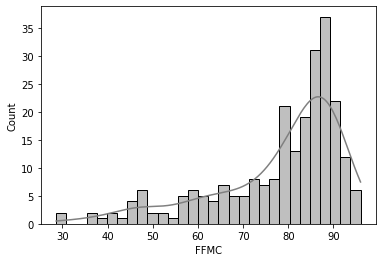

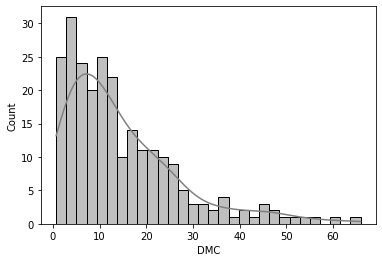

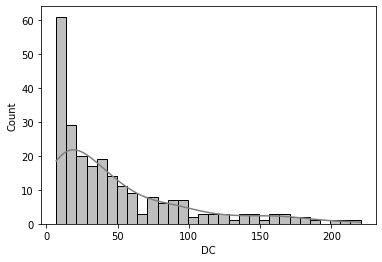

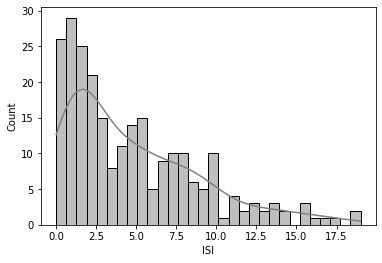

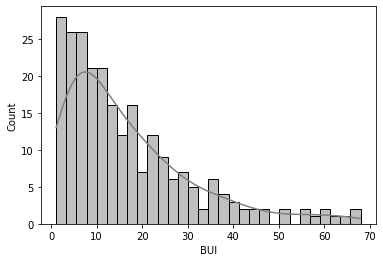

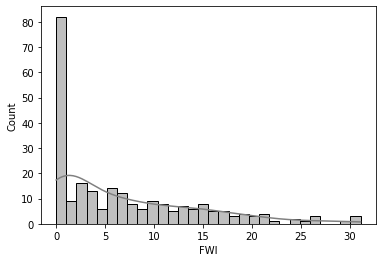

In [27]:
#Checking plots for Continous features
for feature in Con_feature:
    sns.histplot(data=df,x= feature, kde=True, bins=30, color='Grey')
    plt.show()

Observations:
 1. RH graph follows Gaussian Disturbion.
 2. FFMC graph follows left skewed distribution.
 3. Rain, DMC, DC, ISI, BUI, FWI are follows right skewed distribution(Log-Normal distribution).

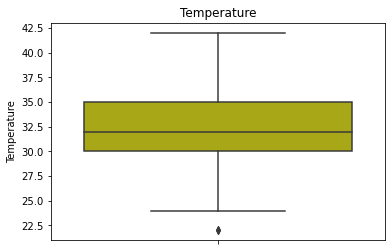

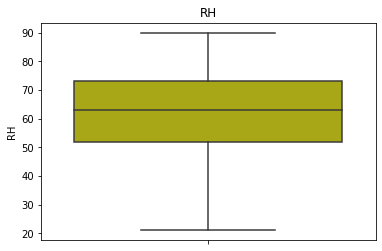

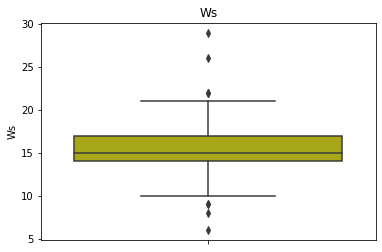

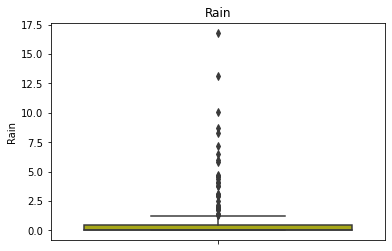

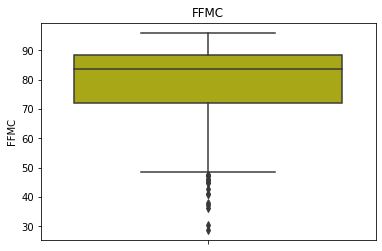

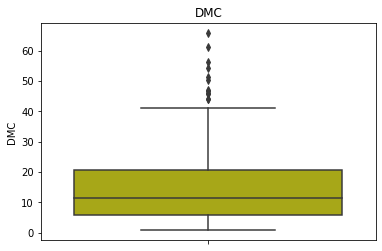

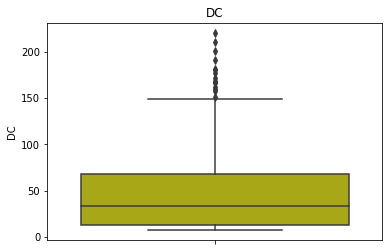

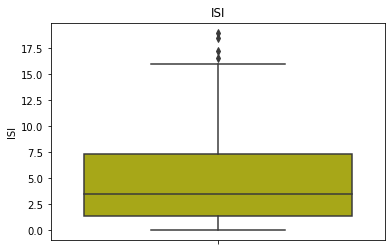

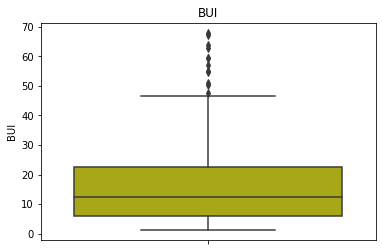

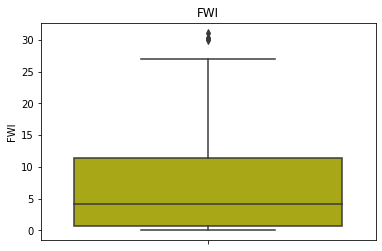

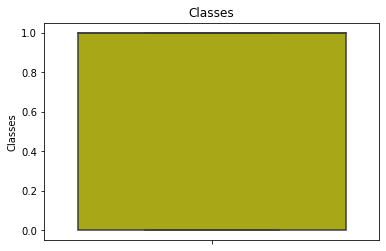

In [28]:
#Checking Outliners
for feature in [feature for feature in Num_feature if feature not in ['day', 'month', 'year','Region']]:
    sns.boxplot(data=df, y=feature, color='y')
    plt.title(feature)
    plt.show()

Observations:
1. RH feature doesnt have outliers.
2. Temperature and FFMC have outliers in lower boundary side.
3. Ws has outliers on both upper and lower sides.
4. Rain, DMC,DC, ISI, BUI and FWI have outilers in upper boundary side.

In [29]:
#Correlation btn each numerical features
data= round(df[[feature for feature in Num_feature if feature not in ['day', 'month', 'year', 'Region']]].corr(),2)
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.48,0.37,0.61,0.46,0.56,0.52
RH,-0.65,1.00,0.24,0.22,-0.65,-0.41,-0.22,-0.69,-0.35,-0.57,-0.44
Ws,-0.28,0.24,1.00,0.17,-0.16,-0.00,0.08,0.02,0.03,0.03,-0.07
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32,-0.38
FFMC,0.68,-0.65,-0.16,-0.54,1.00,0.60,0.50,0.74,0.59,0.69,0.77
DMC,0.48,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.67,0.98,0.87,0.58
DC,0.37,-0.22,0.08,-0.30,0.50,0.88,1.00,0.50,0.94,0.74,0.51
ISI,0.61,-0.69,0.02,-0.35,0.74,0.67,0.50,1.00,0.64,0.91,0.74
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.94,0.64,1.00,0.86,0.58
FWI,0.56,-0.57,0.03,-0.32,0.69,0.87,0.74,0.91,0.86,1.00,0.71


<AxesSubplot:>

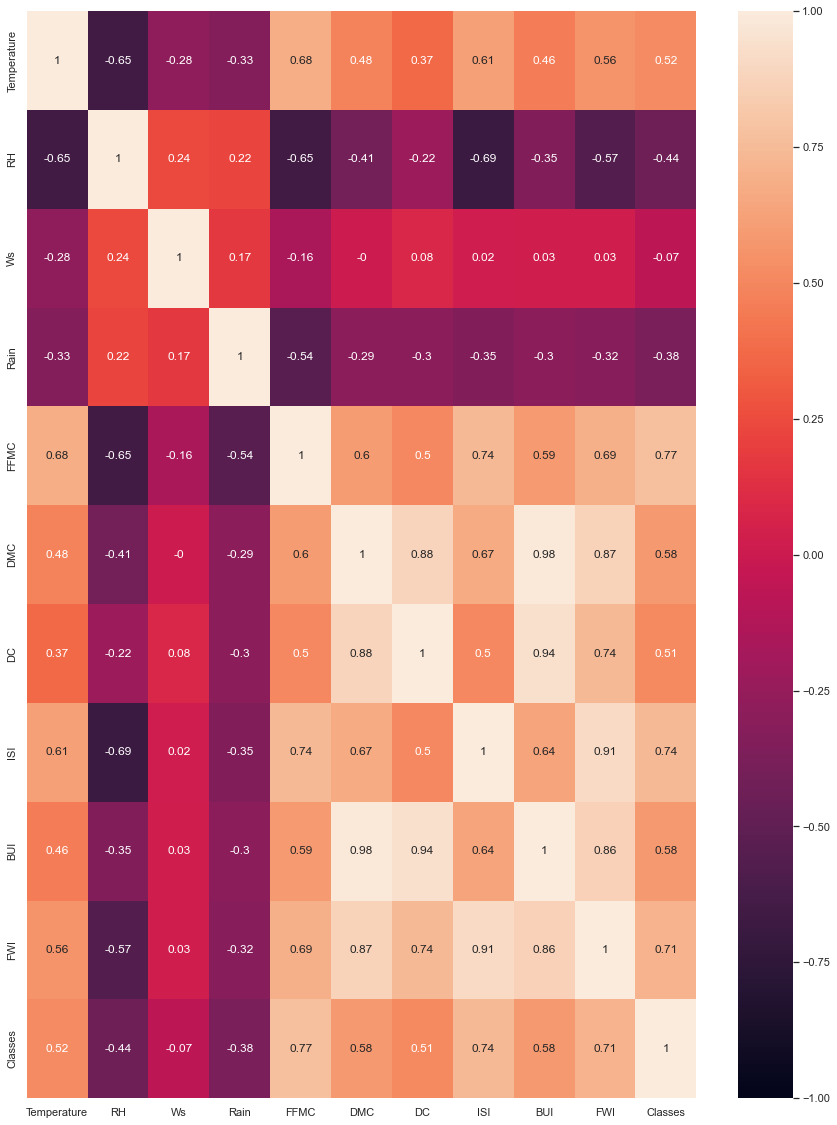

In [30]:
#Heatmap for the Visualizaing the correlation data
sns.set(rc={"figure.figsize":(15,20)})
sns.heatmap(data=data,vmin=-1, vmax=1, annot=True)

Observations:
By seeing the heatmap, we can conclude that 
1. DC-BUI, DMC-BUI and ISI-FWI are very highly correalted.
2. ISI-FFMC, DMC-FMI, DMC-DC, DMC-FWI, BUI-FWI and DC-FWI are highly correalted.

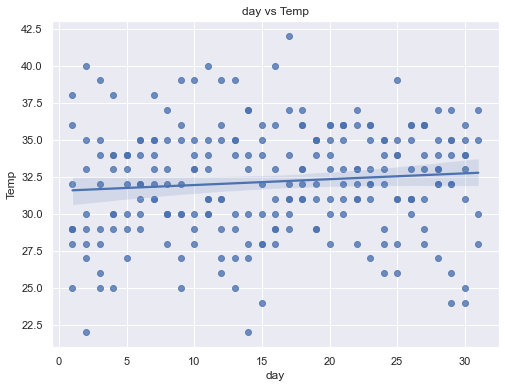

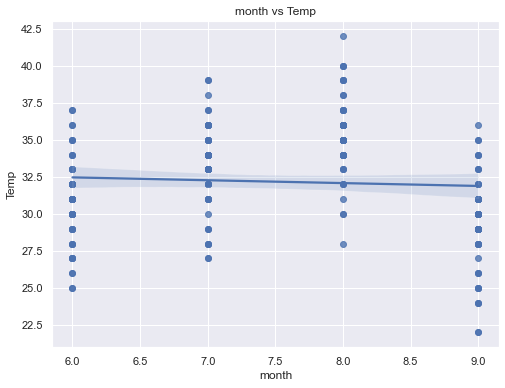

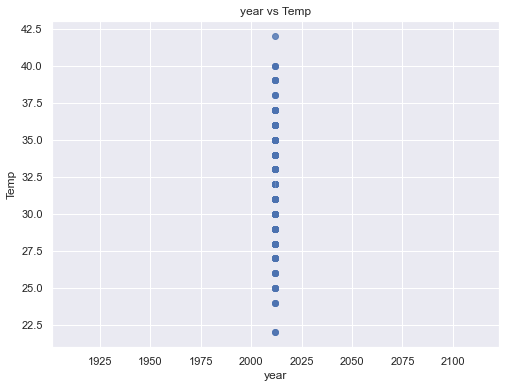

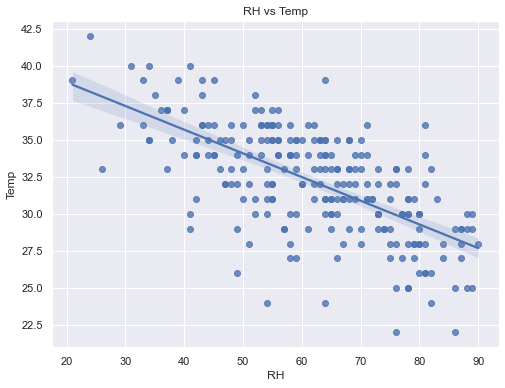

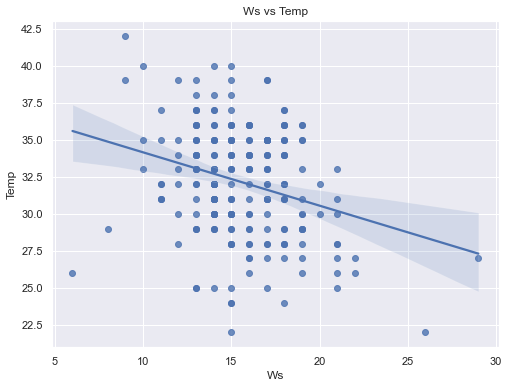

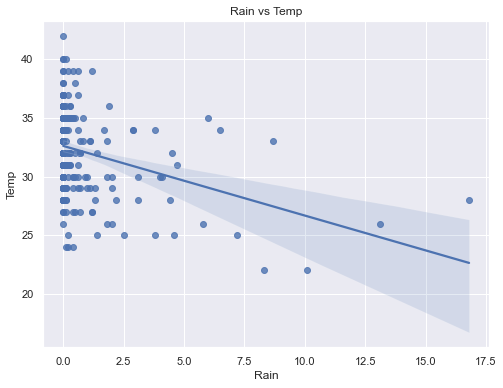

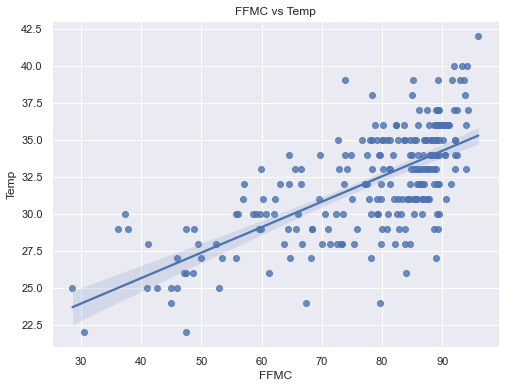

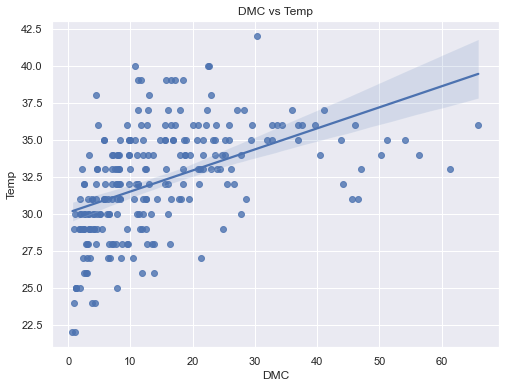

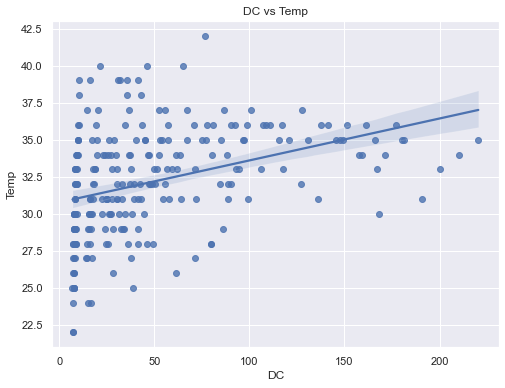

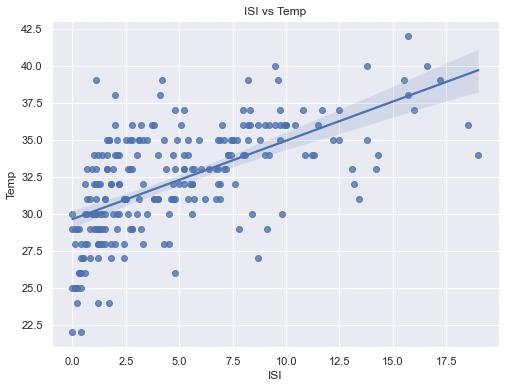

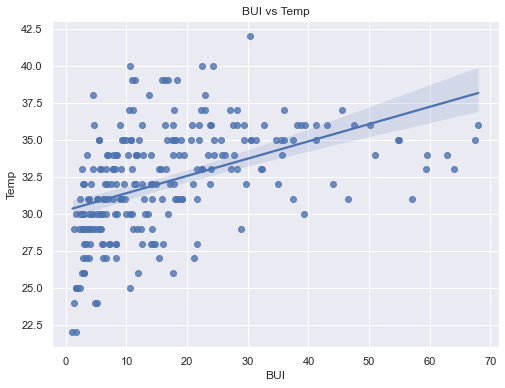

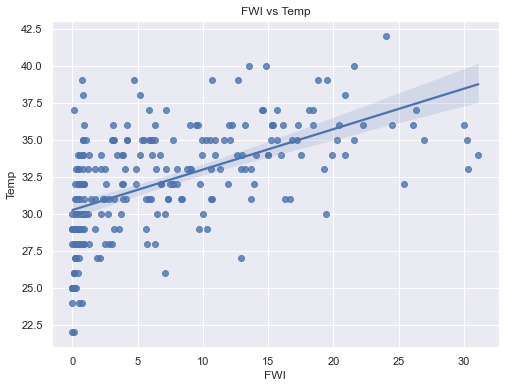

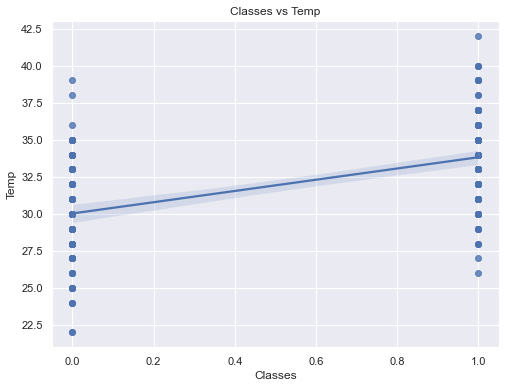

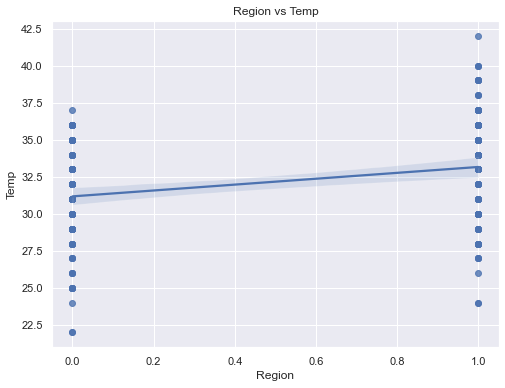

In [31]:
#Finding the best fit line betwn Independent and Dependent varible as the probelm statment states to predict the temp of the fire so, temp is dependent and others are independent
for feature in [feature for feature in df.columns if feature not in ['Temperature']]:
    sns.set(rc={'figure.figsize':(8,6)})
    sns.regplot(x=df[feature], y=df['Temperature'])
    plt.xlabel(feature)
    plt.ylabel('Temp')
    plt.title('{} vs Temp'.format(feature))
    plt.show()

# Model Prepartion 

In [32]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [33]:
df['Temp']=df['Temperature']

In [34]:
df.drop('Temperature',axis=1, inplace=True)

In [35]:
df.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Temp
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0,29
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0,29
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0,26
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0,25
4,5,6,2012,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0,27


In [36]:
# X is independent feature
# Y is Dependent feature

X= df.iloc[:, :-1]
Y= df.iloc[:, -1]

In [37]:
X.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [38]:
Y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temp, dtype: int64

In [39]:
#Spliting up the Test and Train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.33, random_state=42)

In [40]:
X_train.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
114,23,9,2012,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,0,0.0
65,5,8,2012,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1,1,0.0
132,11,6,2012,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,1,1.0
207,25,8,2012,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1,1,1.0
162,11,7,2012,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0,1.0


In [41]:
X_test.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
24,25,6,2012,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,1,0.0
6,7,6,2012,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0.0
153,2,7,2012,48,16,0.0,87.6,7.9,17.8,6.8,7.8,6.4,1,1.0
211,29,8,2012,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,1,1.0
198,16,8,2012,41,10,0.1,92.0,22.6,65.1,9.5,24.2,14.8,1,1.0


In [42]:
Y_train.head()

114    32
65     34
132    31
207    34
162    34
Name: Temp, dtype: int64

In [43]:
Y_test.head()

24     31
6      33
153    33
211    35
198    40
Name: Temp, dtype: int64

In [44]:
X_train.shape, Y_train.shape

((163, 14), (163,))

In [45]:
X_test.shape, Y_test.shape

((81, 14), (81,))

In [46]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [47]:
X_train= scaler.fit_transform(X_train)
X_train

array([[ 0.84447703,  1.3826723 ,  0.        , ..., -0.8196431 ,
        -1.04390785, -0.99388373],
       [-1.19310159,  0.48116996,  0.        , ..., -0.08219052,
         0.95793896, -0.99388373],
       [-0.51390872, -1.32183472,  0.        , ...,  1.36540157,
         0.95793896,  1.0061539 ],
       ...,
       [-1.64589683,  1.3826723 ,  0.        , ..., -0.90158227,
        -1.04390785, -0.99388373],
       [ 1.41047108, -0.42033238,  0.        , ...,  0.31384882,
         0.95793896,  1.0061539 ],
       [-0.51390872,  1.3826723 ,  0.        , ..., -0.87426921,
        -1.04390785, -0.99388373]])

In [48]:
X_test= scaler.transform(X_test)
X_test

array([[ 1.07087465, -1.32183472,  0.        , ...,  0.23190965,
         0.95793896, -0.99388373],
       [-0.96670396, -1.32183472,  0.        , ...,  0.0680313 ,
         0.95793896, -0.99388373],
       [-1.53269802, -0.42033238,  0.        , ..., -0.04122093,
         0.95793896,  1.0061539 ],
       ...,
       [ 1.29727227, -0.42033238,  0.        , ...,  1.17421016,
         0.95793896, -0.99388373],
       [-1.3063004 , -1.32183472,  0.        , ..., -0.77867351,
        -1.04390785,  1.0061539 ],
       [ 1.29727227, -1.32183472,  0.        , ...,  0.7235447 ,
         0.95793896,  1.0061539 ]])

# Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
Linear_Reg= LinearRegression()
Linear_Reg

LinearRegression()

In [51]:
Linear_Reg.fit(X_train,Y_train)

LinearRegression()

In [52]:
#Printing Coeffiecent and intercepts
print("1. Co=effiecient of independent Features is {}".format(Linear_Reg.coef_))
print("2. Intercept of best fit plane is {}". format(Linear_Reg.intercept_))

1. Co=effiecient of independent Features is [-0.62994684 -0.33080692  0.         -0.9681523  -0.55769053  0.23645285
  1.90585623  0.93380592  1.17296981  0.044581   -1.35995788  0.19772494
 -0.25230922  0.08345626]
2. Intercept of best fit plane is 31.98159509202454


In [53]:
#Prediction Of Test data
Linear_reg_pred= Linear_Reg.predict(X_test)
Linear_reg_pred

array([32.86982262, 34.97907511, 34.71895423, 32.93220734, 36.64866482,
       32.00281859, 35.27819508, 28.49312857, 31.84450923, 29.27704091,
       29.06704133, 33.07364481, 32.4667427 , 32.7008168 , 34.32599535,
       31.80453584, 37.01042617, 25.23211237, 32.73196597, 33.38253854,
       31.55571716, 28.30699286, 34.23615097, 29.30603632, 36.93126913,
       24.98756128, 33.51228222, 33.57587507, 33.35705604, 35.40329932,
       33.767112  , 31.85221582, 32.40507656, 33.11736397, 32.44972087,
       31.46599605, 30.34784931, 34.2239929 , 32.37589956, 21.74277219,
       33.82900884, 34.85103093, 31.20651563, 24.69868309, 36.17424894,
       32.81796744, 31.22635993, 30.67357508, 35.1950892 , 34.29311524,
       36.98975313, 30.97884914, 30.95678802, 34.6655222 , 33.46814569,
       32.38222097, 36.65227179, 30.589826  , 30.97603618, 36.10290928,
       33.94615809, 28.43783118, 33.17776773, 31.78923636, 31.99593987,
       24.12810241, 33.39123143, 29.76320324, 36.80847578, 34.30

#Assumptions of Linear Regression
1. Test truth data and Predicted data should follow linear relationship.
2. This is an indication of a good model.

Text(0, 0.5, 'Predicted Data')

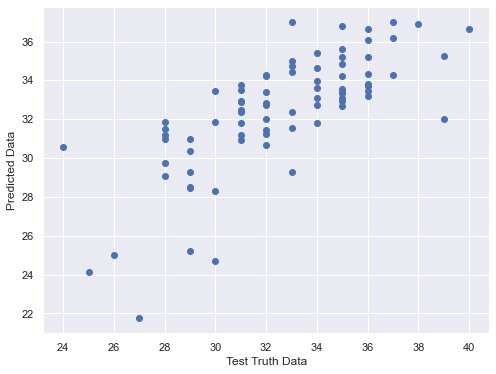

In [54]:
plt.scatter(x=Y_test, y= Linear_reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Predicted Data")

Residual Distribution 
1. Residuals should follow normal distribution.
2. If residuals follow normal distribution, it indicates we have a good model.

In [55]:
Residual_linear_reg= Y_test-Linear_reg_pred
Residual_linear_reg

24    -1.869823
6     -1.979075
153   -1.718954
211    2.067793
198    3.351335
         ...   
180    1.274202
5     -1.960397
56     0.798390
125   -3.430249
148    2.306835
Name: Temp, Length: 81, dtype: float64

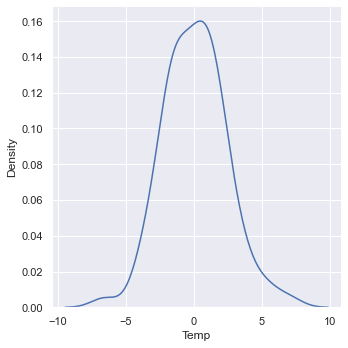

In [56]:
sns.displot(x=Residual_linear_reg,kind="kde")

Uniform distribution
1. Residuals vs Predictions should follow a uniform distribution.
2. If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

Text(0, 0.5, 'Residual')

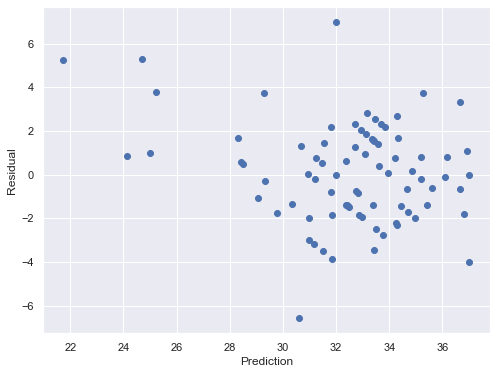

In [57]:
plt.scatter(x=Linear_reg_pred, y= Residual_linear_reg)
plt.xlabel("Prediction")
plt.ylabel('Residual')

In [58]:
#Performace Metrices
#Cost Function
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [59]:
#MSE, MAE, RMSE
print("Mean squared error is {}".format(round(mean_squared_error(Y_test, Linear_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(Y_test, Linear_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(Y_test, Linear_reg_pred)),2)))

Mean squared error is 5.25
Mean absolute error is 1.81
Root Mean squared error is 2.29


In [61]:
# R square and Adjusted R square
from sklearn.metrics import r2_score
Linear_R2_square= r2_score(Y_test, Linear_reg_pred)
print('Linear Regression model has {}% accuracy'.format(round(Linear_R2_square*100,3)))

Linear_Adjusted_R2_square= 1 - (1-Linear_R2_square)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print('Adjusted R sqaure accuarcy is {}%'.format(round(Linear_Adjusted_R2_square*100,3)))

Linear Regression model has 51.089% accuracy
Adjusted R sqaure accuarcy is 40.714%


# Ridge Regression

In [63]:
from sklearn.linear_model import Ridge

In [64]:
Ridge_reg= Ridge()
Ridge_reg

Ridge()

In [65]:
Ridge_reg.fit(X_train, Y_train)

Ridge()

In [66]:
#Printing Coeffiecent and intercepts
print("1. Co=effiecient of independent Features is {}".format(Ridge_reg.coef_))
print("2. Intercept of best fit plane is {}". format(Ridge_reg.intercept_))

1. Co=effiecient of independent Features is [-0.61752995 -0.3207458   0.         -0.98218457 -0.55467826  0.21315492
  1.84131702  0.40094067  0.87094221  0.11396182 -0.48465778  0.08466793
 -0.24063909  0.09187935]
2. Intercept of best fit plane is 31.98159509202454


In [67]:
#Prediction Of Test data
Ridge_reg_pred= Ridge_reg.predict(X_test)
Ridge_reg_pred

array([32.85982748, 34.9149207 , 34.6801255 , 32.92998132, 36.61056862,
       32.05917754, 35.25499575, 28.51988807, 31.83679288, 29.28276684,
       29.06439442, 33.15037313, 32.44677748, 32.7322483 , 34.35814975,
       31.78754571, 36.91567124, 25.31324295, 32.67492302, 33.35526777,
       31.49765658, 28.29644553, 34.22316335, 29.30830796, 36.93224783,
       25.06526261, 33.48461631, 33.57641555, 33.35387649, 35.32860357,
       33.76792408, 31.83362797, 32.37993338, 33.16010038, 32.42109455,
       31.5078178 , 30.28919718, 34.25440049, 32.3007279 , 21.86171205,
       33.83192673, 34.81983629, 31.24261825, 24.76831106, 36.10419592,
       32.77320818, 31.21807666, 30.69260083, 35.1742616 , 34.29037291,
       36.93483074, 30.9447582 , 30.97755205, 34.71719979, 33.43904851,
       32.52070875, 36.64973602, 30.62216011, 30.9696123 , 36.10416977,
       33.88939183, 28.47020463, 33.13493675, 31.7769902 , 32.00695307,
       24.17731957, 33.37004249, 29.76297127, 36.78001537, 34.44

Text(0, 0.5, 'Predicted Data')

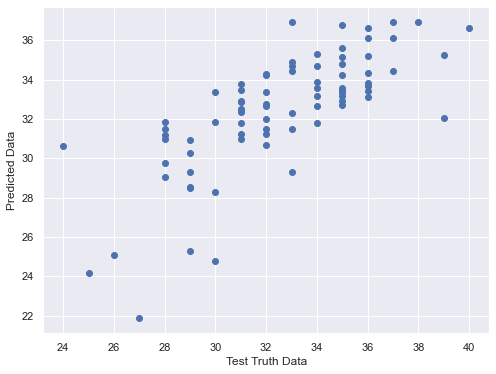

In [68]:
#Linear Relation
plt.scatter(x=Y_test, y= Ridge_reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Predicted Data")

In [69]:
#Residual Realtion
Residual_Ridge_reg= Y_test-Ridge_reg_pred
Residual_Ridge_reg

24    -1.859827
6     -1.914921
153   -1.680125
211    2.070019
198    3.389431
         ...   
180    1.312404
5     -1.914806
56     0.799339
125   -3.383227
148    2.322513
Name: Temp, Length: 81, dtype: float64

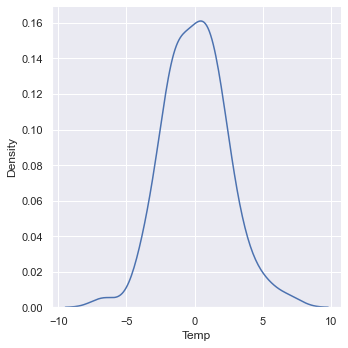

In [70]:
sns.displot(x=Residual_Ridge_reg, kind='kde')

Text(0, 0.5, 'Residual')

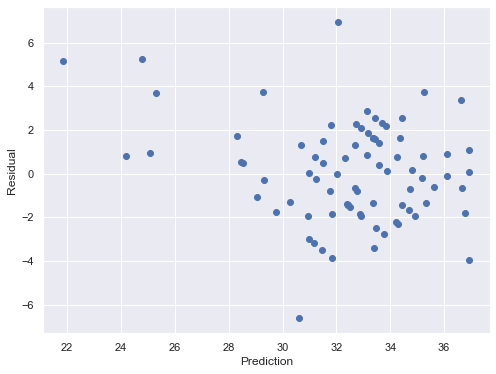

In [71]:
#Uniform Distribution
plt.scatter(x=Ridge_reg_pred, y= Residual_Ridge_reg)
plt.xlabel("Prediction")
plt.ylabel('Residual')

In [72]:
#MSE, MAE, RMSE
print("Mean squared error is {}".format(round(mean_squared_error(Y_test, Ridge_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(Y_test, Ridge_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(Y_test, Ridge_reg_pred)),2)))

Mean squared error is 5.19
Mean absolute error is 1.8
Root Mean squared error is 2.28


In [86]:
# R square and Adjusted R square
from sklearn.metrics import r2_score
Ridge_R2_square= r2_score(Y_test, Ridge_reg_pred)
print('Ridge Regression model has {}% accuracy'.format(round(Ridge_R2_square*100,3)))

Ridge_Adjusted_R2_square= 1 - (1-Ridge_R2_square)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print('Ridge Adjusted R sqaure accuarcy is {}%'.format(round(Ridge_Adjusted_R2_square*100,3)))

Ridge Regression model has 51.709% accuracy
Ridge Adjusted R sqaure accuarcy is 41.465%


# Lasso Regression

In [75]:
from sklearn.linear_model import Lasso

In [76]:
Lasso_reg= Lasso()
Lasso_reg

Lasso()

In [77]:
Lasso_reg.fit(X_train, Y_train)

Lasso()

In [78]:
#Printing Coeffiecent and intercepts
print("1. Co=effiecient of independent Features is {}".format(Lasso_reg.coef_))
print("2. Intercept of best fit plane is {}". format(Lasso_reg.intercept_))

1. Co=effiecient of independent Features is [-0.         -0.          0.         -0.62324302 -0.         -0.
  1.25581509  0.          0.          0.          0.          0.
  0.          0.        ]
2. Intercept of best fit plane is 31.98159509202454


In [79]:
#Prediction Of Test data
Lasso_reg_pred= Lasso_reg.predict(X_test)
Lasso_reg_pred

array([32.78381104, 33.3358205 , 33.53835729, 32.69192045, 34.21212444,
       31.67725854, 34.06518855, 28.84685412, 30.99078013, 30.10392027,
       31.06631475, 32.42020469, 32.80398907, 32.31726957, 33.37068778,
       32.46976122, 34.57875298, 27.38502889, 32.29240264, 33.12192792,
       31.62499111, 29.79900395, 33.65042591, 30.31559056, 34.62053146,
       28.73534108, 32.5527626 , 32.85187888, 32.99739235, 33.91411932,
       33.25917474, 31.27076256, 32.79238897, 32.82670067, 32.58151856,
       32.71432078, 31.4254765 , 33.30564213, 31.04995877, 28.31033379,
       32.79596672, 32.94981382, 32.61305239, 27.48796401, 34.24588058,
       32.5549849 , 31.88399562, 30.89031162, 34.19107957, 33.50571231,
       34.39861652, 31.81203876, 31.79074958, 32.97252542, 33.46393383,
       32.11393291, 34.88311373, 32.60669677, 31.06489233, 34.43070593,
       33.14932842, 31.16313854, 33.31119788, 32.23069043, 32.12966634,
       27.92377153, 33.05552681, 31.68837004, 34.34770454, 34.11

Text(0, 0.5, 'Predicted Data')

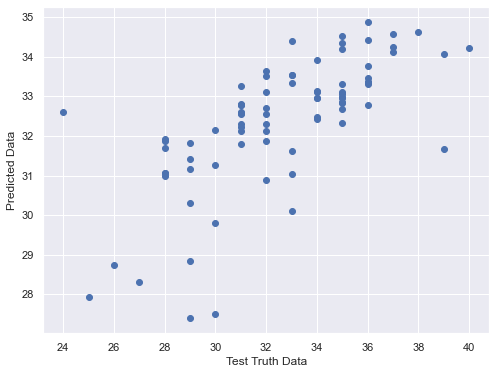

In [80]:
#Linear Relation
plt.scatter(x=Y_test, y= Lasso_reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Predicted Data")

In [81]:
#Residual Realtion
Residual_Lasso_reg= Y_test-Lasso_reg_pred
Residual_Lasso_reg

24    -1.783811
6     -0.335821
153   -0.538357
211    2.308080
198    5.787876
         ...   
180    0.884428
5     -1.305114
56     2.230039
125   -2.157622
148    2.629312
Name: Temp, Length: 81, dtype: float64

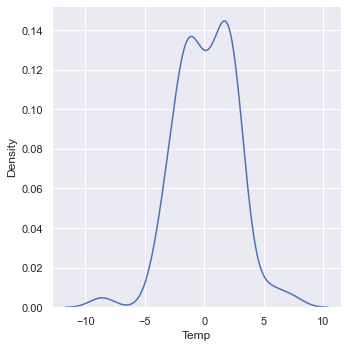

In [82]:
sns.displot(x=Residual_Lasso_reg, kind='kde')

Text(0, 0.5, 'Residual')

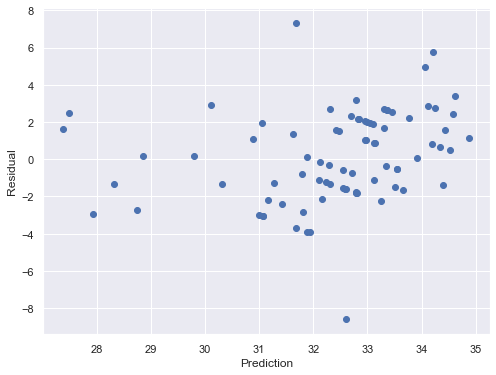

In [83]:
#Uniform Distribution
plt.scatter(x=Lasso_reg_pred, y= Residual_Lasso_reg)
plt.xlabel("Prediction")
plt.ylabel('Residual')

In [84]:
#MSE, MAE, RMSE
print("Mean squared error is {}".format(round(mean_squared_error(Y_test, Lasso_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(Y_test, Lasso_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(Y_test, Lasso_reg_pred)),2)))

Mean squared error is 6.09
Mean absolute error is 2.0
Root Mean squared error is 2.47


In [87]:
# R square and Adjusted R square
from sklearn.metrics import r2_score
Lasso_R2_square= r2_score(Y_test, Lasso_reg_pred)
print('Lasso Regression model has {}% accuracy'.format(round(Lasso_R2_square*100,3)))

Lasso_Adjusted_R2_square= 1 - (1-Lasso_R2_square)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print('Lasso Adjusted R sqaure accuarcy is {}%'.format(round(Lasso_Adjusted_R2_square*100,2)))

Lasso Regression model has 43.342% accuracy
Lasso Adjusted R sqaure accuarcy is 31.32%


# Elastic Net Regression

In [88]:
from sklearn.linear_model import ElasticNet

In [89]:
Elasticnet_reg= ElasticNet()
Elasticnet_reg

ElasticNet()

In [90]:
Elasticnet_reg.fit(X_train, Y_train)

ElasticNet()

In [91]:
#Printing Coeffiecent and intercepts
print("1. Co=effiecient of independent Features is {}".format(Elasticnet_reg.coef_))
print("2. Intercept of best fit plane is {}". format(Elasticnet_reg.intercept_))

1. Co=effiecient of independent Features is [-0.         -0.          0.         -0.68808933 -0.10544712 -0.00834786
  0.85162206  0.10376148  0.          0.23158765  0.02547021  0.15362153
  0.07372069  0.        ]
2. Intercept of best fit plane is 31.98159509202454


In [92]:
#Prediction Of Test data
Elasticnet_reg_pred= Elasticnet_reg.predict(X_test)
Elasticnet_reg_pred

array([32.70014869, 33.29910099, 33.41026626, 32.61092932, 34.7047485 ,
       31.58360838, 34.21527053, 29.02563256, 30.73347022, 30.11039166,
       30.41277398, 32.24275851, 32.49689882, 32.11572726, 33.82943086,
       32.26602144, 35.60101706, 27.89264401, 32.12951491, 32.95265792,
       31.02735367, 29.65251053, 33.71392821, 30.09882338, 35.36763797,
       28.87850096, 32.39310489, 32.86323328, 32.70140428, 34.17896096,
       33.34379291, 31.19918174, 32.72501691, 33.05000354, 32.11073799,
       32.39596102, 30.82655691, 33.29618332, 31.03905163, 27.97071052,
       32.81078878, 32.83085009, 32.18944481, 27.83881794, 34.71347157,
       32.40467835, 31.69547324, 30.73847724, 34.32027173, 33.61283179,
       35.5799204 , 31.38989764, 31.57088417, 33.58592157, 33.61999323,
       32.2560815 , 36.04767586, 32.00594323, 30.83622131, 34.89715148,
       33.0854042 , 30.78738109, 33.49083492, 31.9555529 , 31.71431021,
       27.98432489, 32.99835463, 31.35802614, 35.34742765, 34.15

Text(0, 0.5, 'Predicted Data')

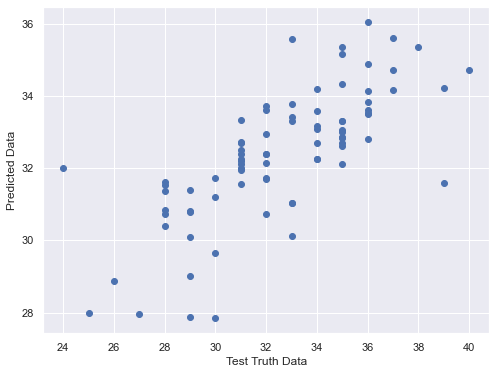

In [93]:
#Linear Relation
plt.scatter(x=Y_test, y= Elasticnet_reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Predicted Data")

In [94]:
#Residual Realtion
Residual_Elasticnet_reg= Y_test-Elasticnet_reg_pred
Residual_Elasticnet_reg

24    -1.700149
6     -0.299101
153   -0.410266
211    2.389071
198    5.295251
         ...   
180    0.831457
5     -1.003679
56     1.867206
125   -1.721239
148    2.476763
Name: Temp, Length: 81, dtype: float64

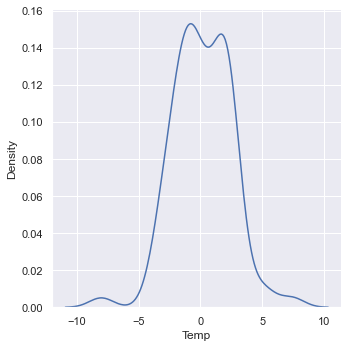

In [95]:
sns.displot(x=Residual_Elasticnet_reg, kind='kde')

Text(0, 0.5, 'Residual')

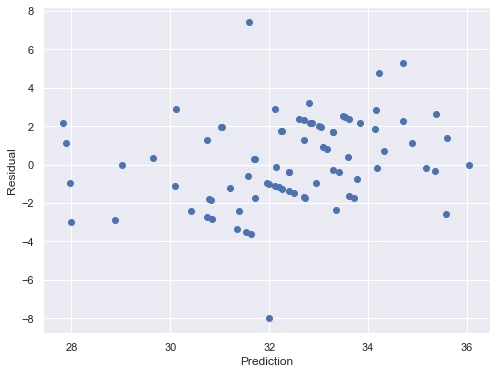

In [96]:
#Uniform Distribution
plt.scatter(x=Elasticnet_reg_pred, y= Residual_Elasticnet_reg)
plt.xlabel("Prediction")
plt.ylabel('Residual')

In [97]:
#MSE, MAE, RMSE
print("Mean squared error is {}".format(round(mean_squared_error(Y_test, Elasticnet_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(Y_test, Elasticnet_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(Y_test, Elasticnet_reg_pred)),2)))

Mean squared error is 5.39
Mean absolute error is 1.85
Root Mean squared error is 2.32


In [99]:
# R square and Adjusted R square
from sklearn.metrics import r2_score
Elasticnet_R2_square= r2_score(Y_test, Elasticnet_reg_pred)
print('Elasticnet Regression model has {}% accuracy'.format(round(Elasticnet_R2_square*100,3)))

Elasticnet_Adjusted_R2_square= 1 - (1-Elasticnet_R2_square)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print('Adjusted R sqaure accuarcy is {}%'.format(round(Elasticnet_Adjusted_R2_square*100,3)))

Elasticnet Regression model has 49.812% accuracy
Adjusted R sqaure accuarcy is 39.166%


# Comparsion of All models

# Mean Sqaure error

In [ ]:
print("MSE of Linear Regression is {} \nMSE of Ridge Regression is {} \nMSE of Lasso Regression is {} \nMSE of ElasticNet Regression is {}".format(round(mean_squared_error(Y_test, Linear_reg_pred),2),round(mean_squared_error(Y_test, Ridge_reg_pred),2),round(mean_squared_error(Y_test, Lasso_reg_pred),2),round(mean_squared_error(Y_test, Elasticnet_reg_pred),2)))

# Mean Absolute Error

In [ ]:
print("MAE of Linear Regression is {} \nMAE of Ridge Regression is {} \nMAE of Lasso Regression is {} \nMAE of ElasticNet Regression is {}".format(round(mean_absolute_error(Y_test, Linear_reg_pred),2),round(mean_absolute_error(Y_test, Ridge_reg_pred),2),round(mean_absolute_error(Y_test, Lasso_reg_pred),2),round(mean_absolute_error(Y_test, Elasticnet_reg_pred),2)))

# Root Mean Sqaure Error

In [ ]:
print("RMSE of Linear Regression is {} \nRMSE of Ridge Regression is {} \nRMSE of Lasso Regression is {} \nRMSE of ElasticNet Regression is {}".format(round(np.sqrt(mean_squared_error(Y_test, Linear_reg_pred)),2),round(np.sqrt(mean_squared_error(Y_test, Ridge_reg_pred)),2),round(np.sqrt(mean_squared_error(Y_test, Lasso_reg_pred)),2),round(np.sqrt(mean_squared_error(Y_test, Elasticnet_reg_pred)),2)))

# R sqaure Value

In [101]:
print('Linear Regression model has accuracy of {}% \nRidge Regression model has accuracy of {}%\nLasso Regression model has accuracy of {}%\nElastic Net model has accuracy of {}%'.format(round(Linear_R2_square*100,3),round(Ridge_R2_square*100,3),round(Lasso_R2_square*100,3),round(Elasticnet_R2_square*100,3)))

Linear Regression model has accuracy of 51.089% 
Ridge Regression model has accuracy of 51.709%
Lasso Regression model has accuracy of 43.342%
Elastic Net model has accuracy of 49.812%


In [102]:
print('Adjusted R2 of Linear Regreesion model is {}% \nAdjusted R2 of Ridge Regression model is {}%\nAdjusted R2 of Lasso Regression model is {}%\nAdjusted R2 of Elastic Net model is {}%'.format(round(Linear_Adjusted_R2_square*100,3),round(Ridge_Adjusted_R2_square*100,3),round(Lasso_Adjusted_R2_square*100,3),round(Elasticnet_Adjusted_R2_square*100,3)))

Adjusted R2 of Linear Regreesion model is 40.714% 
Adjusted R2 of Ridge Regression model is 41.465%
Adjusted R2 of Lasso Regression model is 31.324%
Adjusted R2 of Elastic Net model is 39.166%
